In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
import sys
import pandas as pd
import numpy as np

# Add the src directory to the Python path
sys.path.append('../src')
from feature_engineering import FeatureEngineering
from Credit_scoring import CreditScoring

# Feature Engineering

In [3]:
# Load the raw_data
raw_data = pd.read_csv('../data/raw/data.csv')

In [4]:
# Create a copy of the data to work on
processed_data = raw_data.copy()

In [5]:
#Initialize the class
data = FeatureEngineering(processed_data)

### Task 1: Create Aggregate Features

- **Total Transaction Amount**: Sum of all transaction amounts for each customer.
- **Average Transaction Amount**: Average transaction amount per customer.
- **Transaction Count**: Number of transactions per customer.
- **Standard Deviation of Transaction Amounts**: Variability of transaction amounts per customer.


In [6]:
# 1. Create aggregate features
agg_features = data.create_aggregate_features('CustomerId', 'Amount')


In [7]:
#display the first 5 rows
agg_features.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,total_transaction_amount,average_transaction_amount,transaction_count,std_transaction_amount
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0,109921.75,923.712185,119,3042.294251
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0,109921.75,923.712185,119,3042.294251
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0,1000.00,500.000000,2,0.000000
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0,228727.20,6019.136842,38,17169.241610
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0,228727.20,6019.136842,38,17169.241610


### Extract Features

- **Transaction Hour**: The hour of the day when the transaction occurred.
- **Transaction Day**: The day of the month when the transaction occurred.
- **Transaction Month**: The month when the transaction occurred.
- **Transaction Year**: The year when the transaction occurred.


In [8]:

# 2. Extract features from the 'TransactionStartTime' column (assuming it's a datetime column)
df_with_extracted_features = data.extract_features('TransactionStartTime')


Date features extracted successfully.


In [9]:
processed_data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


### Task 3: Encode Categorical Variables

Convert categorical variables into numerical format by using:

- **One-Hot Encoding**: Converts categorical values into binary vectors.
- **Label Encoding**: Assigns a unique integer to each category.

**One-Hot Encoded Columns:**
- **ProductCategory**

**Label Encoded Columns:**
- **ProviderId**
- **ProductId**
- **ChannelId**
- **PricingStrategy**


In [10]:

# 3 Encode categorical variables (e.g., 'CountryCode', 'PricingStrategy')
df_onehot_encoded = data.encode_categorical_variables(['ProductCategory'], encoding_method='onehot')


In [11]:
df_label_encoded = data.encode_categorical_variables(categorical_columns=['ProviderId','ProductId','ChannelId','PricingStrategy'], encoding_method='label')


In [12]:
df_label_encoded.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ChannelId,...,Transaction_Day,Transaction_Hour,ProductCategory_data_bundles,ProductCategory_financial_services,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,5,1,2,...,15,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,3,19,1,...,15,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,5,0,2,...,15,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0,11,2,...,15,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,3,19,1,...,15,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


### Handle Missing Values

Use imputation or removal to handle missing values:

- **Imputation**: Filling missing values with mean, median, mode, or using more advanced methods like KNN imputation.
- **Removal**: Removing rows or columns with missing values if they are few.


In [14]:

# 4. Handle missing values in specific columns (e.g., 'Amount')
df_with_missing_values_handled = data.handle_missing_values(['Amount'], strategy='mean')


No missing values found in the specified columns.


### Normalize/Standardize Numerical Features

Normalization and standardization are scaling techniques used to bring all numerical features onto a similar scale.

- **Normalization**: Scales the data to a range of [0, 1].
- **Standardization**: Scales the data to have a mean of 0 and a standard deviation of 1.

The **Amount** and **Value** columns are scaled using both methods, while keeping the original columns intact.


In [15]:

# 5. Normalize or standardize numerical columns (e.g., 'TransactionAmount')
df_Standardized = data.normalize_standardize(['Amount','Value'], method='standardize', return_full_df=False)

In [16]:
df_Standardized.head()

,Amount_standardized,Value_standardized
0,-0.046371,-0.072291
1,-0.054643,-0.080251
2,-0.050426,-0.076352
3,0.107717,0.096648
4,-0.059704,-0.075183


In [17]:

# 5. Normalize or standardize numerical columns (e.g., 'TransactionAmount')
df_normalized = data.normalize_standardize(['Amount','Value'], method='standardize')

In [18]:
df_normalized.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ChannelId,...,ProductCategory_movies,ProductCategory_other,ProductCategory_ticket,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,Amount_standardized,Value_standardized,Amount_standardized,Value_standardized
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,5,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.046371,-0.072291,-0.046371,-0.072291
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,3,19,1,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.054643,-0.080251,-0.054643,-0.080251
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,5,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.050426,-0.076352,-0.050426,-0.076352
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0,11,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.107717,0.096648,0.107717,0.096648
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,3,19,1,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.059704,-0.075183,-0.059704,-0.075183


In [19]:
df_normalized.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ChannelId',
       'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy',
       'FraudResult', 'total_transaction_amount', 'average_transaction_amount',
       'transaction_count', 'std_transaction_amount', 'Transaction_Year',
       'Transaction_Month', 'Transaction_Day', 'Transaction_Hour',
       'ProductCategory_data_bundles', 'ProductCategory_financial_services',
       'ProductCategory_movies', 'ProductCategory_other',
       'ProductCategory_ticket', 'ProductCategory_transport',
       'ProductCategory_tv', 'ProductCategory_utility_bill',
       'Amount_standardized', 'Value_standardized', 'Amount_standardized',
       'Value_standardized'],
      dtype='object')

## Save the Processed data for future use.

In [20]:
df_normalized.to_csv('../data/processed/processed_data.csv', index=False)
print('Data saved successfully')

Data saved successfully


# Default estimator and WoE binning

In [47]:
data = pd.read_csv('../data/processed/processed_data.csv')

In [48]:
# Initialize the class
estimator  = CreditScoring(data,recency_column='TransactionStartTime',frequency_column='transaction_count', monetary_column='total_transaction_amount')

In [49]:
# Calculate Recency, Frequency, and Monetary
estimator.calculate_recency()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ChannelId,...,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,Amount_standardized,Value_standardized,Amount_standardized.1,Value_standardized.1,Recency,Frequency,Monetary
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,5,1,2,...,0.0,0.0,0.0,-0.046371,-0.072291,-0.046371,-0.072291,89,119,109921.75
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,3,19,1,...,0.0,0.0,0.0,-0.054643,-0.080251,-0.054643,-0.080251,89,119,109921.75
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,5,0,2,...,0.0,0.0,0.0,-0.050426,-0.076352,-0.050426,-0.076352,9,2,1000.00
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0,11,2,...,0.0,0.0,1.0,0.107717,0.096648,0.107717,0.096648,85,38,228727.20
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,3,19,1,...,0.0,0.0,0.0,-0.059704,-0.075183,-0.059704,-0.075183,85,38,228727.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,3,19,1,...,0.0,0.0,0.0,-0.062591,-0.072291,-0.062591,-0.072291,0,573,2438140.00
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,5,1,2,...,0.0,0.0,0.0,-0.046371,-0.072291,-0.046371,-0.072291,0,43,58499.60
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,3,19,1,...,0.0,0.0,0.0,-0.054643,-0.080251,-0.054643,-0.080251,0,43,58499.60
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,5,8,2,...,0.0,1.0,0.0,-0.030151,-0.056047,-0.030151,-0.056047,0,524,851985.00


In [50]:
# Assign RFMS scores
estimator.assign_rfms_scores(recency_col='Recency', frequency_col='Frequency', monetary_col='Monetary')

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ChannelId,...,Value_standardized,Amount_standardized.1,Value_standardized.1,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFMS_Score
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,5,1,2,...,-0.072291,-0.046371,-0.072291,89,119,109921.75,1,3,2,2.10
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,3,19,1,...,-0.080251,-0.054643,-0.080251,89,119,109921.75,1,3,2,2.10
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,5,0,2,...,-0.076352,-0.050426,-0.076352,9,2,1000.00,3,1,1,1.50
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0,11,2,...,0.096648,0.107717,0.096648,85,38,228727.20,1,2,3,2.15
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,3,19,1,...,-0.075183,-0.059704,-0.075183,85,38,228727.20,1,2,3,2.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,3,19,1,...,-0.072291,-0.062591,-0.072291,0,573,2438140.00,4,4,4,4.00
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,5,1,2,...,-0.072291,-0.046371,-0.072291,0,43,58499.60,4,2,1,2.10
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,3,19,1,...,-0.080251,-0.054643,-0.080251,0,43,58499.60,4,2,1,2.10
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,5,8,2,...,-0.056047,-0.030151,-0.056047,0,524,851985.00,4,4,4,4.00


In [51]:
# Assign Good/Bad labels
estimator.assign_good_bad_labels(rfms_col='RFMS_Score', threshold=2.5)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ChannelId,...,Amount_standardized.1,Value_standardized.1,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFMS_Score,Default_Label
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,5,1,2,...,-0.046371,-0.072291,89,119,109921.75,1,3,2,2.10,Bad
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,3,19,1,...,-0.054643,-0.080251,89,119,109921.75,1,3,2,2.10,Bad
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,5,0,2,...,-0.050426,-0.076352,9,2,1000.00,3,1,1,1.50,Bad
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,0,11,2,...,0.107717,0.096648,85,38,228727.20,1,2,3,2.15,Bad
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,3,19,1,...,-0.059704,-0.075183,85,38,228727.20,1,2,3,2.15,Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,3,19,1,...,-0.062591,-0.072291,0,573,2438140.00,4,4,4,4.00,Good
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,5,1,2,...,-0.046371,-0.072291,0,43,58499.60,4,2,1,2.10,Bad
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,3,19,1,...,-0.054643,-0.080251,0,43,58499.60,4,2,1,2.10,Bad
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,5,8,2,...,-0.030151,-0.056047,0,524,851985.00,4,4,4,4.00,Good


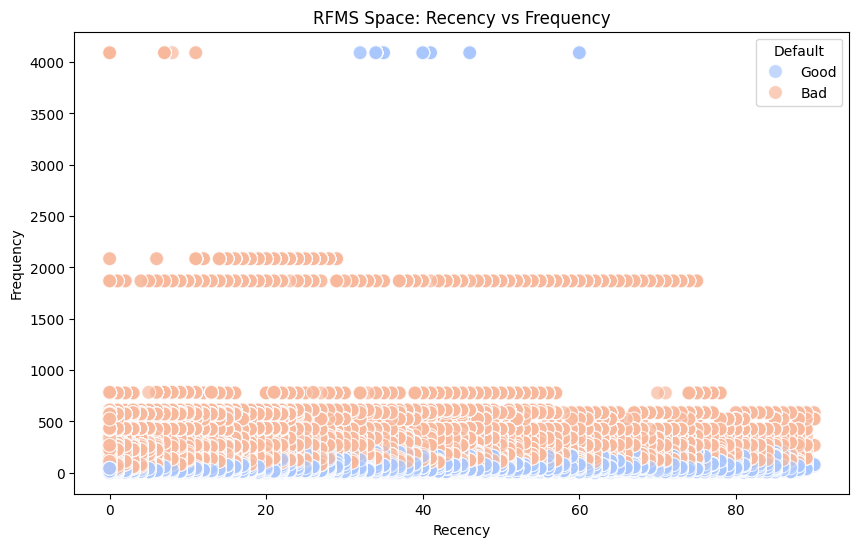

In [56]:
estimator.plot_rfms_space(recency_col='Recency', frequency_col='Frequency')

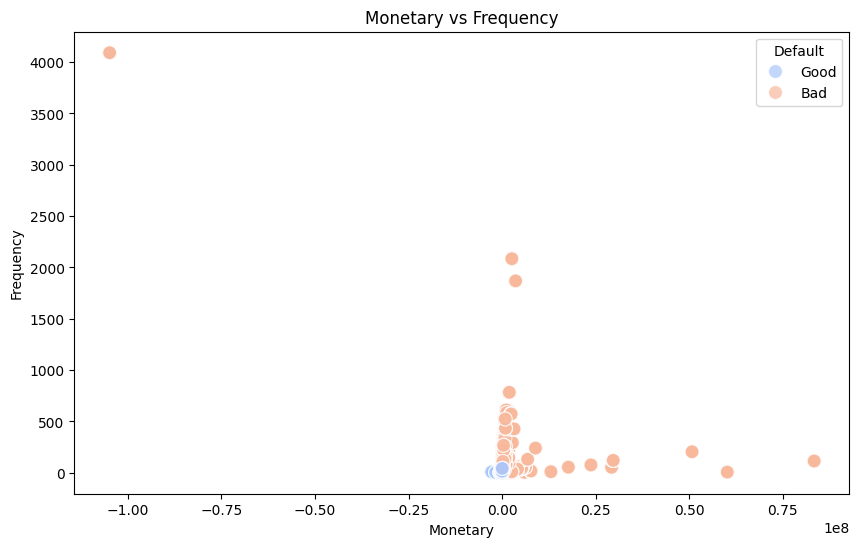

In [57]:
estimator.plot_monetary_vs_frequency(monetary_col='Monetary', frequency_col='Frequency')

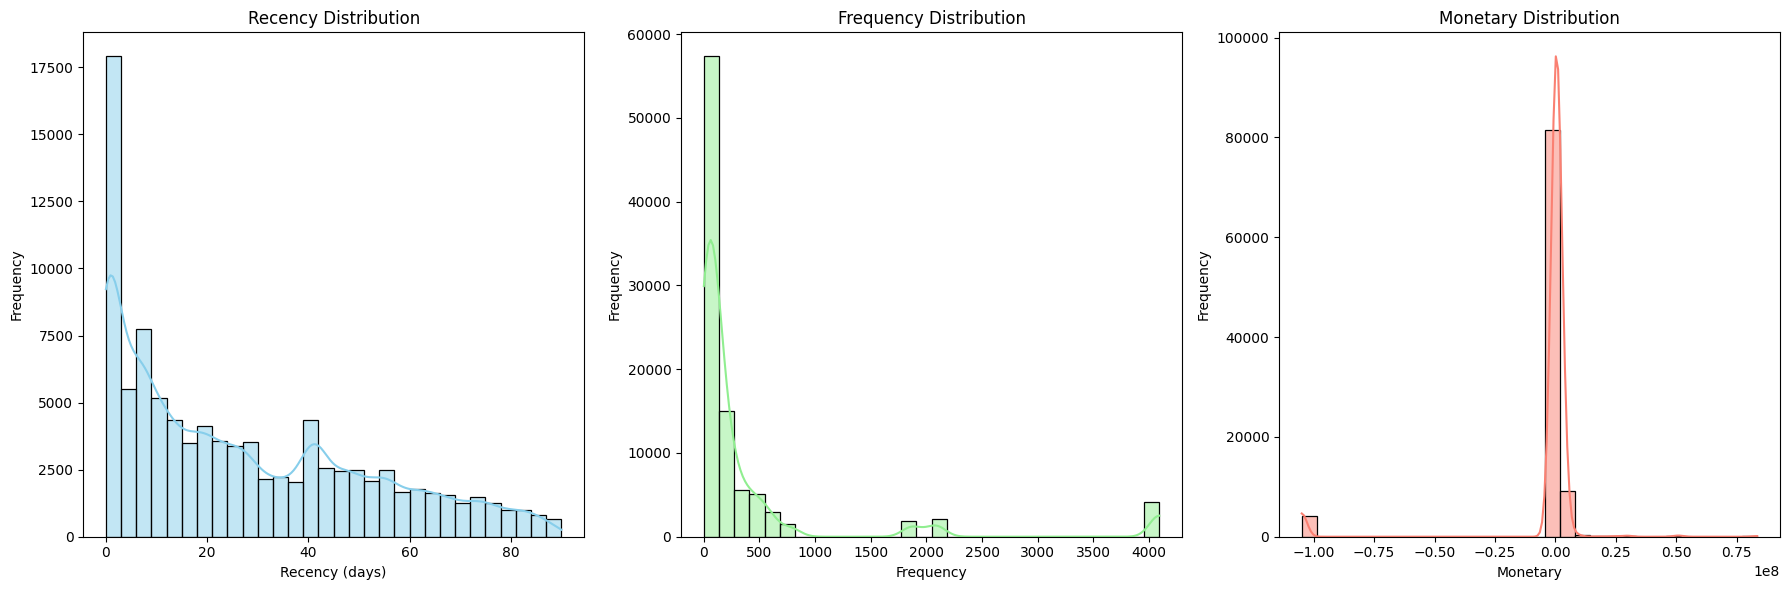

In [58]:
estimator.plot_rfm_distribution()

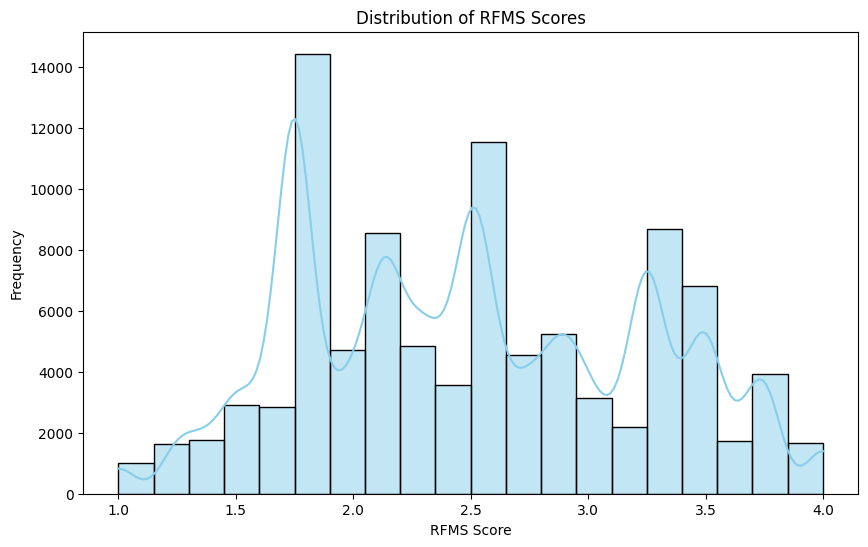

In [59]:
estimator.plot_rfms_score_distribution()

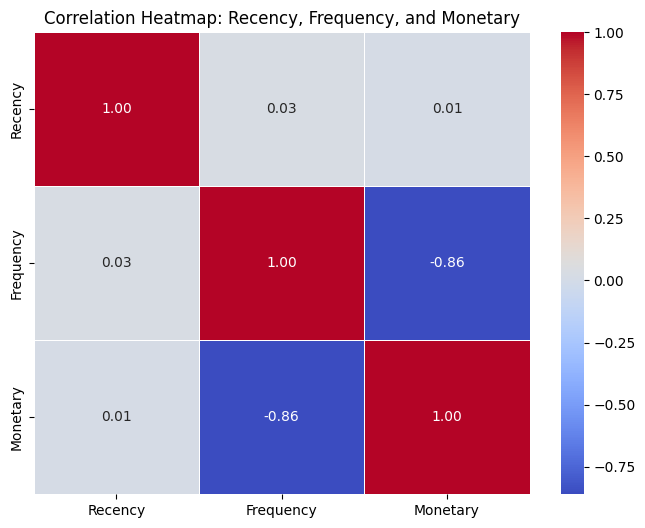

In [60]:
estimator.plot_correlation_heatmap(recency_col='Recency', frequency_col='Frequency', monetary_col='Monetary')